# Feature Transformation
1. Missing Value Imputation (Remove Missing Values | Impute Missing Values)<br>
    - Remove (drop) <br>
    - Impute (CCA: Complete Case Analysis) <br>
        - Univariate Imputation (Use When MCAR: Missing Completely at random ) <br><br>
            a. Numerical <br><br>
                - Mean/median<br>
                - Random (Applicable for both num and cat data)<br>
                - End of Distribution (NMAR: Not missing at Random)<br><br>
            b. Categorical<br><br>
                - Mode<br>
                - Missing indicator (for both num and cat data)<br><br>
        - Multivariate Imputation<br><br>
            - KNN imputer <br>
            - Iterative Imputer <br>
            - MICE (Multivariate Imputation by Chained Equations)<br><br>


https://www.youtube.com/@dataschool

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = sns.load_dataset('penguins')
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Univariate Imputation (Numerical)

In [6]:
df = pd.read_csv("titanic_toy.csv")
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [7]:
df['Age_mean'] = df['Age'].fillna(df['Age'].mean())
df['Age_median'] = df['Age'].fillna(df['Age'].median())

df['Fare_mean'] = df['Fare'].fillna(df['Fare'].mean())
df['Fare_median'] = df['Fare'].fillna(df['Fare'].median())

In [8]:
df.sample(5)

,Age,Fare,Family,Survived,Age_mean,Age_median,Fare_mean,Fare_median
812,35.0,10.5000,0,0,35.000000,35.0,10.500000,10.5000
420,NaN,7.8958,0,0,29.699118,28.0,7.895800,7.8958
783,NaN,23.4500,3,0,29.699118,28.0,23.450000,23.4500
882,22.0,10.5167,0,0,22.000000,22.0,10.516700,10.5167
336,29.0,NaN,1,0,29.000000,29.0,32.279338,14.4542


<Axes: xlabel='Age_median', ylabel='Fare_median'>

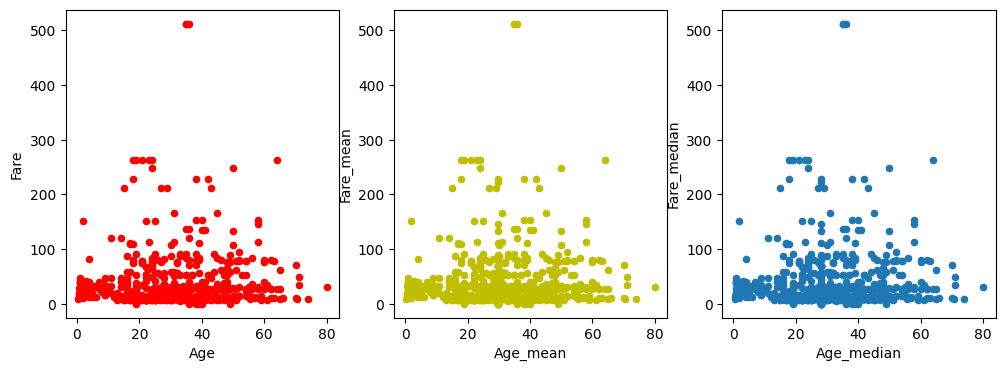

In [9]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

df.plot(x='Age',y='Fare',kind='scatter',ax=ax1,c='r')
df.plot(x='Age_mean',y='Fare_mean',kind='scatter',ax=ax2,c='y')
df.plot(x='Age_median',y='Fare_median',kind='scatter',ax=ax3)

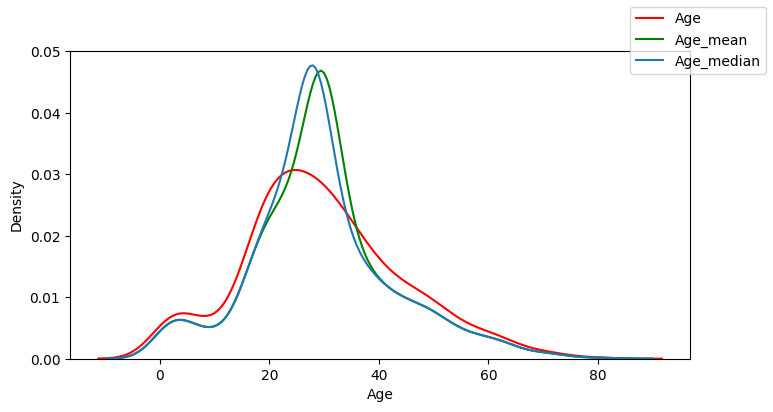

In [10]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,4))

sns.kdeplot(data=df,x='Age',ax=ax1,c='r',label='Age')
sns.kdeplot(data=df,x='Age_mean',ax=ax1,c='g',label='Age_mean')
sns.kdeplot(data=df,x='Age_median',ax=ax1,label='Age_median')
fig.legend()

Text(0.5, 1.0, 'Pandas KDE Plot')

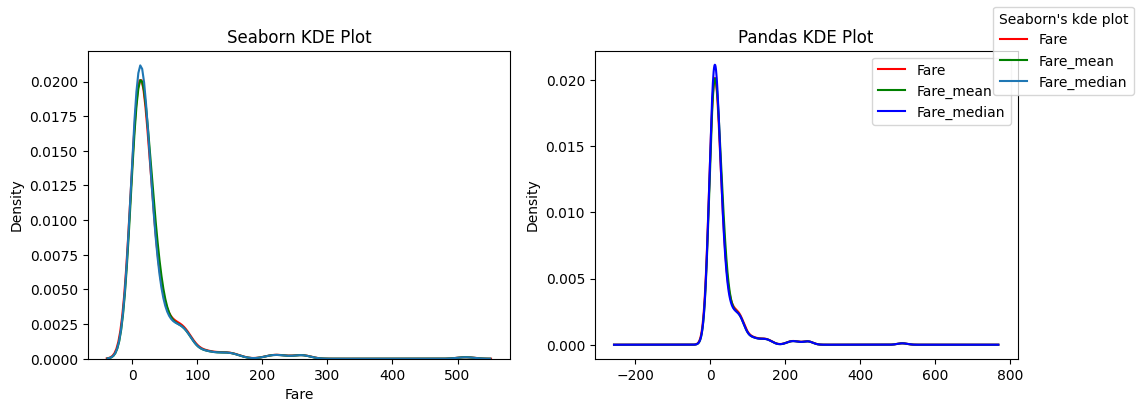

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

# seaborn kde plot
sns.kdeplot(data=df,x='Fare',ax=ax1,c='r',label='Fare')
sns.kdeplot(data=df,x='Fare_mean',ax=ax1,c='g',label='Fare_mean')
sns.kdeplot(data=df,x='Fare_median',ax=ax1,label='Fare_median')
fig.legend(title="Seaborn's kde plot")
ax1.set_title('Seaborn KDE Plot')
# Pandas KDE Plot

df['Fare'].plot(kind='kde',ax=ax2,c='r',label='Fare',legend=True)
df['Fare_mean'].plot(kind='kde',ax=ax2,c='g',label='Fare_mean',legend=True)
df['Fare_median'].plot(kind='kde',ax=ax2,c='b',label='Fare_median',legend=True)
ax2.set_title("Pandas KDE Plot")

<Axes: >

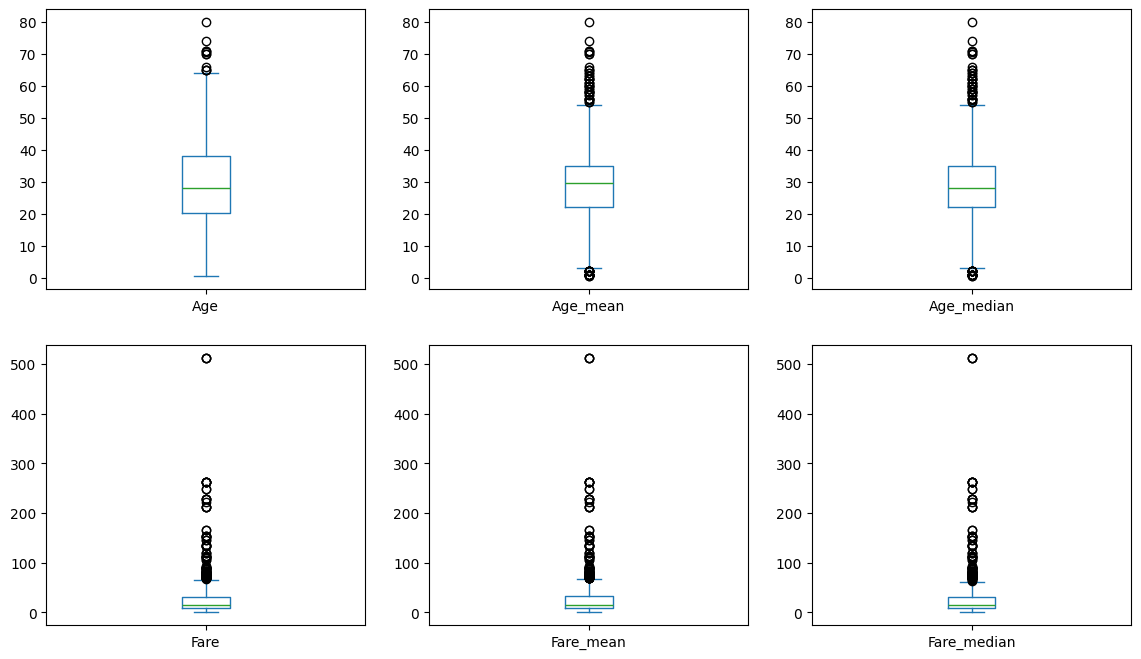

In [12]:
# Box plots to detect the outliers
fig ,axes = plt.subplots(2,3,figsize=(14,8))

df['Age'].plot(kind='box',ax=axes[0][0])
df['Age_mean'].plot(kind='box',ax=axes[0][1])
df['Age_median'].plot(kind='box',ax=axes[0][2])


df['Fare'].plot(kind='box',ax=axes[1][0])
df['Fare_mean'].plot(kind='box',ax=axes[1][1])
df['Fare_median'].plot(kind='box',ax=axes[1][2])



## Using Scikit learn

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['Age','Fare','Family']],df['Survived'])

In [15]:
X_train['Age'].isnull().sum()

139

In [16]:
# Create object with strategy
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

mean_Train = imputer1.fit_transform(X_train)
median_Train = imputer2.fit_transform(X_train)

In [17]:
pd.DataFrame(mean_Train,columns=X_train.columns).isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64

In [18]:
pd.DataFrame(median_Train,columns=X_train.columns).isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64

## Using Transfomers

In [19]:
trf = ColumnTransformer([
    ('trf1',imputer1,['Age']),
    ('trf2',imputer2,['Fare'])
],remainder='passthrough')

trf.fit(X_train)

C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1', SimpleImputer(), ['Age']),
                                ('trf2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [20]:
trf.named_transformers_['trf1'].statistics_

array([29.52519849])

# Univariate Imputation (Categorical)


ChatGPT
The ?raw=true parameter at the end of a GitHub URL is often used to obtain the raw content of a file rather than its rendered view on GitHub. This is particularly useful when you want to directly download files, such as CSVs, from GitHub repositories using scripts or commands like curl or directly in Python using libraries like pandas. Here’s how you can achieve what you want using Python with pandas:

In [33]:
# focus on the ?raw=True at the last of url (Suggested) 
# data = pd.read_csv("https://github.com/user/folder/train.csv?raw=true")
data = pd.read_csv("A:\\py-code\\1 ML\\Feature-Engineering\\train.csv")
data = data[['GarageQual','FireplaceQu','SalePrice']]
data

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


In [34]:
data.isnull().sum()

GarageQual      81
FireplaceQu    690
SalePrice        0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GarageQual   1379 non-null   object
 1   FireplaceQu  770 non-null    object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


<Axes: xlabel='FireplaceQu', ylabel='count'>

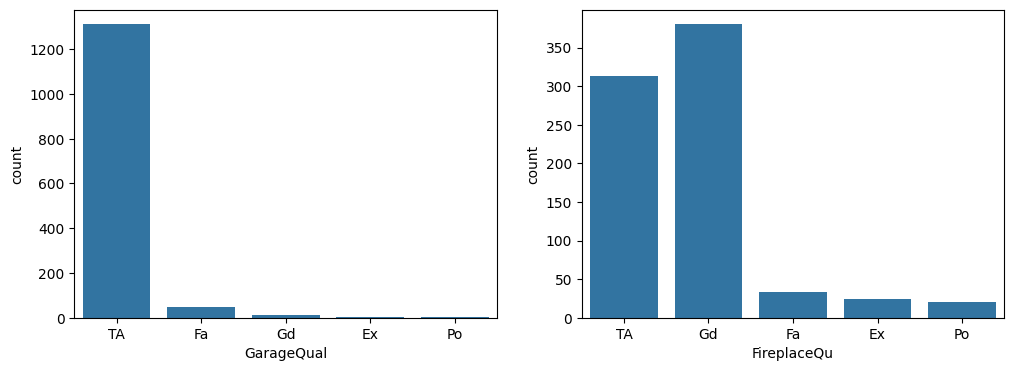

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
# countplot for the categorical data
sns.countplot(data=data, x='GarageQual', ax=ax1)
sns.countplot(data=data, x='FireplaceQu', ax=ax2)


In [49]:
data[['GarageQual','FireplaceQu']].fillna('Missing').isnull().sum()

GarageQual     0
FireplaceQu    0
dtype: int64

<Axes: xlabel='GarageQual', ylabel='count'>

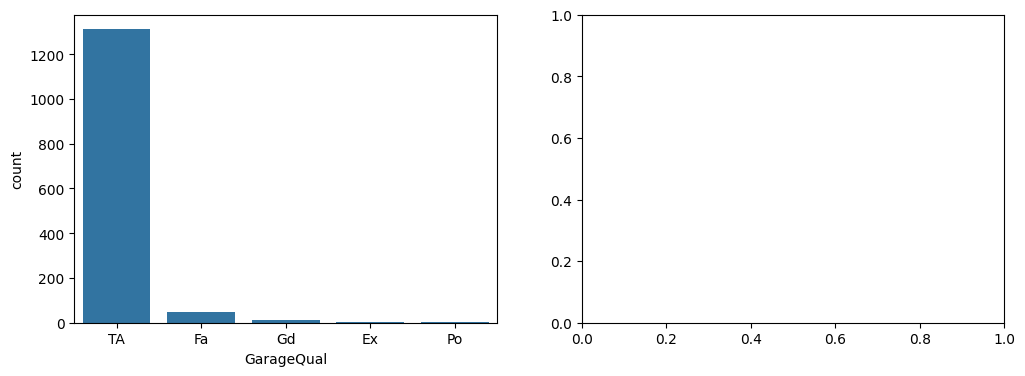

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
# countplot for the categorical data
sns.countplot(data=data,x='GarageQual',ax=ax1)


# Univariate Imputation (Random & Missing Indicator)
- Applicable for both numerical and categorical data